In [1]:
## Compare parameter values for EKI and history matching at iteration 1
import os
import glob
import csv


import numpy as np
import matplotlib.pyplot as plt
import matplotlib

## Plot Results of EKI so far

In [2]:
basedir = os.environ['SCRATCH']+f"/EKI/"

In [3]:
plotdir = f"{basedir}/PLOTS/"

In [4]:
## Create array
n_its = 4
N = 50

params_files = [f"{basedir}/iteration_{n}/paramlist.csv" for n in range(0,n_its+1)]
params = [np.genfromtxt(params_file, delimiter=',', skip_header=1) for params_file in params_files]


param_arr = np.zeros((n_its+1, N, 2))
for i in range(n_its+1):
    param_arr[i] = params[i][:, 1:]

iter_ind = np.arange(n_its+1)

In [5]:
param_arr.shape, iter_ind.shape

((5, 50, 2), (5,))

## Parameters at each iteration
Here we make plots at each iteration of cw_tropics and Bt_eq

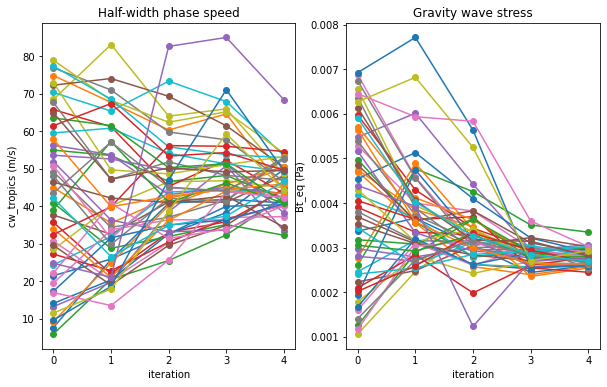

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(10,6))

for i in range(N):
    plt.sca(ax[0])
    plt.plot(iter_ind, param_arr[:, i, 0], 'o-')
    plt.sca(ax[1])
    plt.plot(iter_ind, param_arr[:, i, 1], 'o-')

plt.sca(ax[0])
plt.title("Half-width phase speed")
plt.ylabel("cw_tropics (m/s)")
plt.xlabel("iteration")
plt.sca(ax[1])
plt.title("Gravity wave stress")
plt.ylabel("Bt_eq (Pa)")
plt.xlabel("iteration")
plt.savefig(f"{plotdir}/parameters_each_iteration.png")

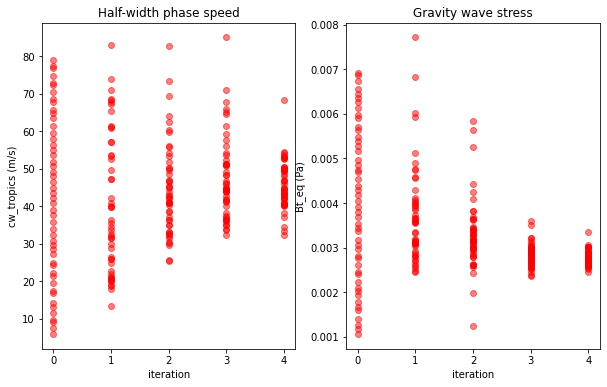

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(10,6))

for i in range(N):
    plt.sca(ax[0])
    plt.plot(iter_ind, param_arr[:, i, 0], 'o', color="red", alpha=0.5)
    plt.sca(ax[1])
    plt.plot(iter_ind, param_arr[:, i, 1], 'o',  color="red", alpha=0.5)

plt.sca(ax[0])
plt.title("Half-width phase speed")
plt.ylabel("cw_tropics (m/s)")
plt.xlabel("iteration")
plt.sca(ax[1])
plt.title("Gravity wave stress")
plt.ylabel("Bt_eq (Pa)")
plt.xlabel("iteration")
plt.savefig(f"{plotdir}/parameters_each_iteration_points_only.png")

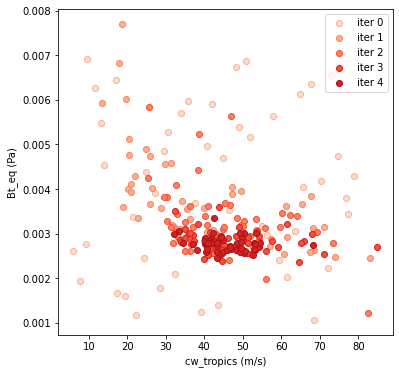

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))
cmap = plt.cm.Reds
norm = matplotlib.colors.Normalize(vmin=-1, vmax=n_its+2)
for i in range(n_its+1):
    plt.scatter(param_arr[i,:,0], param_arr[i,:,1], color = cmap(norm(i)), 
                edgecolor=cmap(norm(i+1)), label=f"iter {i}")
plt.xlabel("cw_tropics (m/s)")
plt.ylabel("Bt_eq (Pa)")
plt.legend()
plt.savefig(f"{plotdir}/2d_parameters_each_iteration.png")

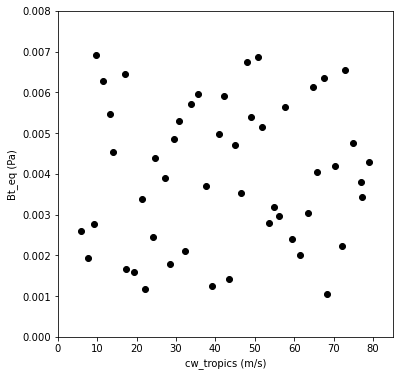

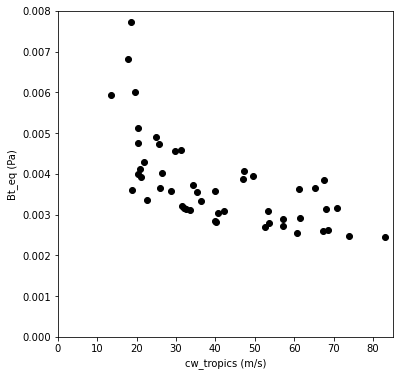

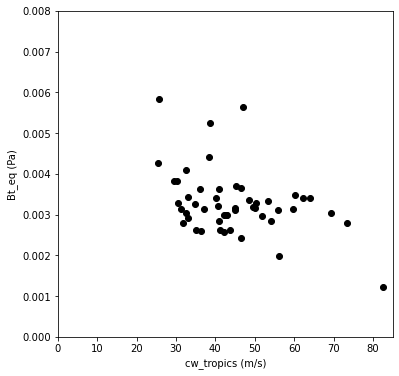

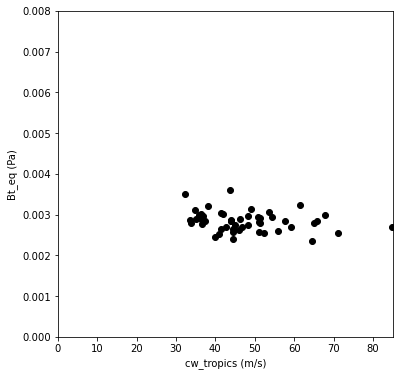

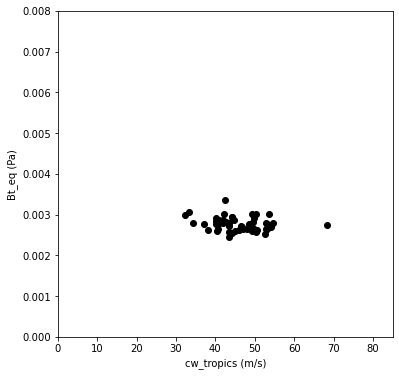

In [11]:
cmap = plt.cm.Reds
norm = matplotlib.colors.Normalize(vmin=-1, vmax=n_its+2)
for i in range(n_its+1):
    fig, ax = plt.subplots(1, 1, figsize=(6,6))
    plt.scatter(param_arr[i,:,0], param_arr[i,:,1], color = 'k')
    plt.axis(xmin=0, xmax=85, ymin=0.000, ymax=0.008 )
    plt.xlabel("cw_tropics (m/s)")
    plt.ylabel("Bt_eq (Pa)")
    plt.savefig(f"{plotdir}/2d_parameters_iteration_{i}.png")

## Plot QBO outputs
Here we plot how the QBO period and amplitude evolves at each iteration

In [13]:
## QBO files
QBO_dir = [f"{basedir}/iteration_{n}/" for n in range(0,n_its+1)]
QBO_arr = np.zeros((n_its, N, 2))

for i in range(n_its):
    for j in range(N):
        
        QBO_file = f"{QBO_dir[i]}{j}/QBO_TT_metrics.csv"
        
        try:
            QBO_vals = np.genfromtxt(QBO_file, delimiter=',', skip_header=1)
            QBO_arr[i, j] = QBO_vals[1:3]
        except:
            print("Could not find file", QBO_file)
            QBO_arr[i, j, :] = [np.nan, np.nan]


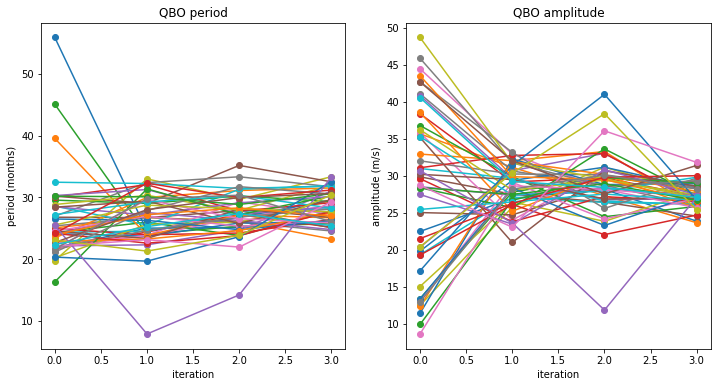

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))

for i in range(N):
    plt.sca(ax[0])
    plt.plot(iter_ind[:n_its], QBO_arr[:, i, 0], 'o-')
    plt.sca(ax[1])
    plt.plot(iter_ind[:n_its], QBO_arr[:, i, 1], 'o-')

plt.sca(ax[0])
plt.title("QBO period")
plt.ylabel("period (months)")
#plt.axis(ymin=20, ymax=40)
plt.xlabel("iteration")
plt.sca(ax[1])
plt.title("QBO amplitude")
plt.ylabel("amplitude (m/s)")
plt.xlabel("iteration")
plt.savefig(f"{plotdir}/outputs_each_iteration.png")

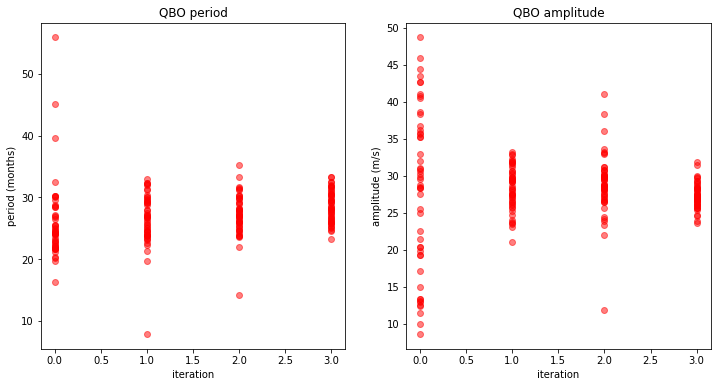

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))

for i in range(N):
    plt.sca(ax[0])
    plt.plot(iter_ind[:n_its], QBO_arr[:, i, 0], 'o', color="red", alpha=0.5)
    plt.sca(ax[1])
    plt.plot(iter_ind[:n_its], QBO_arr[:, i, 1], 'o', color="red", alpha=0.5)

plt.sca(ax[0])
plt.title("QBO period")
plt.ylabel("period (months)")
#plt.axis(ymin=20, ymax=40)
plt.xlabel("iteration")
plt.sca(ax[1])
plt.title("QBO amplitude")
plt.ylabel("amplitude (m/s)")
plt.xlabel("iteration")
plt.savefig(f"{plotdir}/outputs_each_iteration_points_only.png")